The exercise files don't contain data, so I decided to use these tetrode recordings from here https://zenodo.org/record/3825284#.ZGAR8NJBxkhto do the exercises.

Hooray! Mystery dataset! And it's fantastic!

As a side note this is a fantastic resource https://allensdk.readthedocs.io/en/v1.4.0/_static/examples/nb/ecephys_lfp_analysis.html

In [12]:
#from mountainlab_pytools import readmda
import numpy as np
import h5py
filename = '/home/maria/Documents/neural_data_science_youtube_course/data/recordings_36cells_four-tetrodes_30.0_10.0uV_20-06-2019_14_48.h5'

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    #a_group_key = list(f.keys())[0]
    recordings_key='recordings'

    # get the object type for a_group_key: usually group or dataset
    #print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[recordings_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[recordings_key])
    # preferred methods to get dataset values:
    ds_obj = f[recordings_key]      # returns as a h5py dataset object
    ds_arr = f[recordings_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['channel_positions', 'info', 'recordings', 'spike_traces', 'spiketrains', 'template_celltypes', 'template_locations', 'template_rotations', 'templates', 'timestamps', 'voltage_peaks']>


In [8]:
ds_arr.shape

(16, 960000)

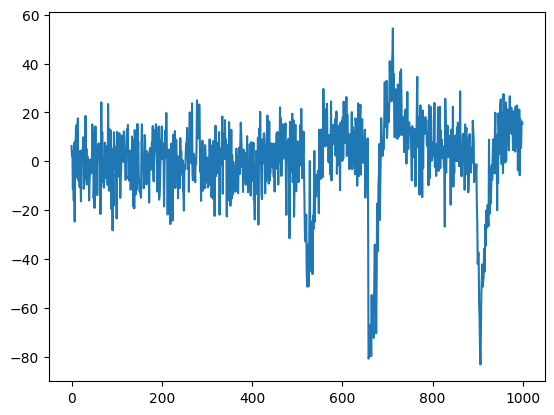

In [13]:
import matplotlib.pyplot as plt

plt.plot(ds_arr[0,:1000])

In [44]:
#The recording lasts for 30 seconds

Fs=ds_arr.shape[1]/30
print('Sampling rate in Hz: ',fs)
dt = 1/Fs

Sampling rate in Hz:  32000.0


## Task 1: Filter Signal

In order to detect action potentials, the first step is to filter out low frequency fluctuations (LFP) and high frequency noise. Determine appropriate filter settings and implement the filtering in the function ```filterSignal()```. A typical choice for this task would be a butterworth filter. Plot a segment of the raw signal and the filtered signal for all four channels with matching y-axis. The segment you choose should contain spikes. When you apply the function also test different filter settings. Hint: Make sure to use a filter that compensates for phase shifting.

*Grading: 2 pts*


In [41]:
from scipy import signal
def filterSignal(x, Fs, low, high, N):
    # Filter raw signal
    #   y = filterSignal(x, Fs, low, high) filters the signal x. Each column in x is one
    #   recording channel. Fs is the sampling frequency. low and high specify the passband in Hz.
    #   The filter delay is compensated in the output y.
    butterworth=signal.butter(N=N, Wn=[low,high], btype='bandpass', analog=False, output='sos', fs=Fs)
    filtered = signal.sosfilt(butterworth, x)
    return filtered

filtered=filterSignal(ds_arr, Fs, low=500, high=3000, N=1)

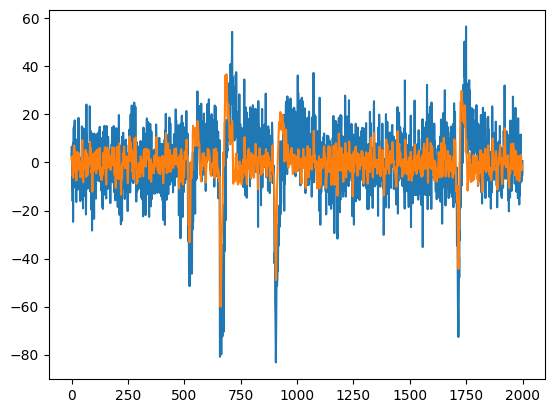

In [42]:
plt.plot(ds_arr[0,:2000])
plt.plot(filtered[0,:2000])

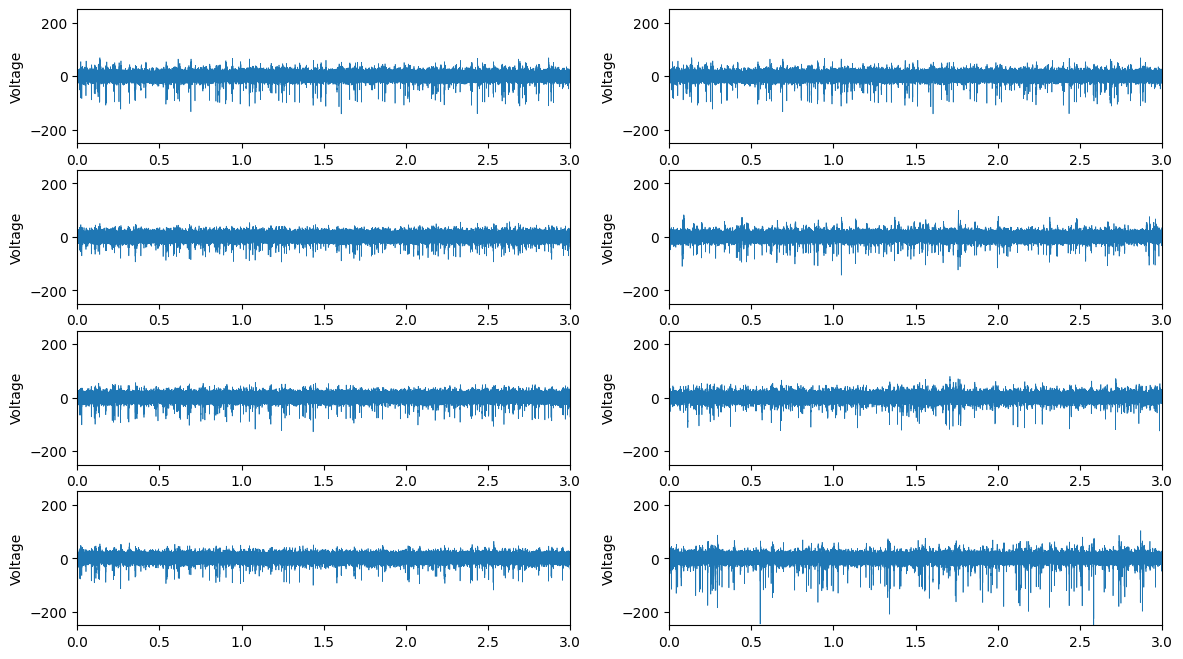

In [55]:
plt.figure(figsize=(14, 8))

T = 100000
t = np.arange(0,T) * dt 

for i in range(0,4):
    plt.subplot(4,2,2*i+1)
    plt.plot(t,ds_arr[i][0:T],linewidth=.5)
    plt.ylim((-250, 250))
    plt.xlim((0,3))
    plt.ylabel('Voltage')
    
    
    plt.subplot(4,2,2*i+2)
    plt.plot(t,ds_arr[4*i][0:T],linewidth=.5)
    plt.ylim((-250, 250))
    plt.xlim((0,3))
    plt.ylabel('Voltage')